In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [171]:
df=pd.read_csv('BigCitiesHealth.csv', index_col = 0)

C:\Users\user\AppData\Local\Temp\ipykernel_11292\2522792096.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('BigCitiesHealth.csv', index_col = 0)


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189979 entries, All Cancer Deaths to Racial Segregation, White and Hispanic
Data columns (total 30 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   metric_cat_label                 189979 non-null  object 
 1   metric_subcat_label              189979 non-null  object 
 2   metric_item_label_subtitle       189979 non-null  object 
 3   metric_cat_item_yaxis_label      189979 non-null  object 
 4   metric_source_desc_label_fn      189979 non-null  object 
 5   metric_source_desc_label_url_fn  189979 non-null  object 
 6   geo_label_city                   189979 non-null  object 
 7   geo_label_state                  188667 non-null  object 
 8   geo_label_citystate              189979 non-null  object 
 9   geo_fips_code                    188667 non-null  float64
 10  value                            189979 non-null  float64
 11  date_label            

In [173]:
df.columns

Index(['metric_cat_label', 'metric_subcat_label', 'metric_item_label_subtitle',
       'metric_cat_item_yaxis_label', 'metric_source_desc_label_fn',
       'metric_source_desc_label_url_fn', 'geo_label_city', 'geo_label_state',
       'geo_label_citystate', 'geo_fips_code', 'value', 'date_label',
       'geo_label_proxy_or_real', 'geo_label_proxy_footnote', 'geo_fips_desc',
       'date_label_proxy_or_real', 'date_label_proxy_footnote',
       'value_ci_flag_yesno', 'value_95_ci_low', 'value_95_ci_high',
       'value_90_ci_low', 'value_90_ci_high', 'geo_strata_region',
       'geo_strata_poverty', 'geo_strata_Population', 'geo_strata_PopDensity',
       'geo_strata_Segregation', 'strata_race_label', 'strata_sex_label',
       'strata_race_sex_label'],
      dtype='object')

In [174]:
df.describe()

,geo_fips_code,value,date_label,value_95_ci_low,value_95_ci_high,value_90_ci_low,value_90_ci_high
count,1.886670e+05,189979.000000,189979.000000,118670.000000,118682.000000,0.0,0.0
mean,2.873779e+06,821.530158,2016.193732,458.349061,552.654749,NaN,NaN
std,1.698817e+06,4587.718159,3.648183,1794.511977,2091.499222,NaN,NaN
min,4.550000e+05,-0.755277,2010.000000,-3173.388887,0.458320,NaN,NaN
25%,8.200000e+05,10.871142,2013.000000,9.422178,15.465618,NaN,NaN
50%,2.938000e+06,26.000000,2016.000000,21.953778,32.798705,NaN,NaN
75%,4.748000e+06,77.094130,2019.000000,100.635606,138.286465,NaN,NaN
max,5.553000e+06,123781.000000,2022.000000,28811.129300,51382.447050,NaN,NaN


In [175]:
df.isnull().sum()

metric_cat_label                        0
metric_subcat_label                     0
metric_item_label_subtitle              0
metric_cat_item_yaxis_label             0
metric_source_desc_label_fn             0
metric_source_desc_label_url_fn         0
geo_label_city                          0
geo_label_state                      1312
geo_label_citystate                     0
geo_fips_code                        1312
value                                   0
date_label                              0
geo_label_proxy_or_real                 0
geo_label_proxy_footnote           173175
geo_fips_desc                           0
date_label_proxy_or_real                0
date_label_proxy_footnote          135220
value_ci_flag_yesno                     0
value_95_ci_low                     71309
value_95_ci_high                    71297
value_90_ci_low                    189979
value_90_ci_high                   189979
geo_strata_region                    1312
geo_strata_poverty                

In [176]:
df['metric_cat_label'].value_counts()

metric_cat_label
Chronic Health Conditions          47473
Social and Economic Factors        28240
Violence and Injury                24655
Mental Health and Substance Use    20714
Life Expectancy and Deaths         18073
Infectious Diseases                17008
Climate and Built Environment      11162
Maternal and Child Health           8659
Access to Health Services           6886
Demographics                        5625
Poisoning                           1484
Name: count, dtype: int64

In [177]:
df['metric_subcat_label'].value_counts()

metric_subcat_label
Deaths                          33959
Cancer                          20290
Substance Use                   12924
Cardiovascular Disease          12801
Income                           9165
Respiratory Infection            8855
Sexually Transmitted Disease     8153
Births                           7966
Mental Health                    7790
Diabetes and Obesity             6996
Housing                          6742
Income-related                   6314
Transportation                   5264
Crime Incidents                  5207
Life Expectancy at Birth         5004
Health Insurance                 4220
Population                       3609
Education                        3211
Physical Activity                3122
Disability                       2743
Active Transportation            2686
Racial Segregation Indices       1872
Heat and Disasters               1846
Language and Nativity            1548
Lead Poisoning                   1484
School Violence               

In [178]:
df['metric_item_label_subtitle'].value_counts()

metric_item_label_subtitle
Years of potential life lost before age 75 (per 100,000 population, age-adjusted)                       6825
Deaths due to unintentional injury, suicide and homicide (per 100,000 population, age-adjusted)         6405
Deaths from all causes (per 100,000 population, age-adjusted)                                           6244
Deaths from all types of cancer (per 100,000 population, age-adjusted)                                  6233
Deaths from heart and blood vessel disorders including stroke (per 100,000 population, age-adjusted)    6195
                                                                                                        ... 
Number people experiencing homelessness, per 100,000 residents                                           266
Ratio of vacant rental housing unit per persons who are unhoused (sheltered and unsheltered)             266
Percent of children aged <18 among persons who are unhoused (sheltered and unsheltered)              

In [179]:
df['metric_cat_item_yaxis_label'].value_counts()

metric_cat_item_yaxis_label
Per 100,000                                     83365
Percent                                         64756
Years per 100,000 population aged <75            6825
Incidents per 100,000                            5207
Years                                            5004
Cases per 100,000                                4772
Lower is better                                  2808
Ratio                                            2743
Dollars                                          2743
Per 1,000 females aged 15-19                     2248
Per 1,000,000                                    1950
Per 100,000 females                              1786
Per 100,000 males                                1726
Per 1,000                                        1479
Days                                              923
Cases per 100,000 live births                     468
Persons per square mile                           455
Number                                            455


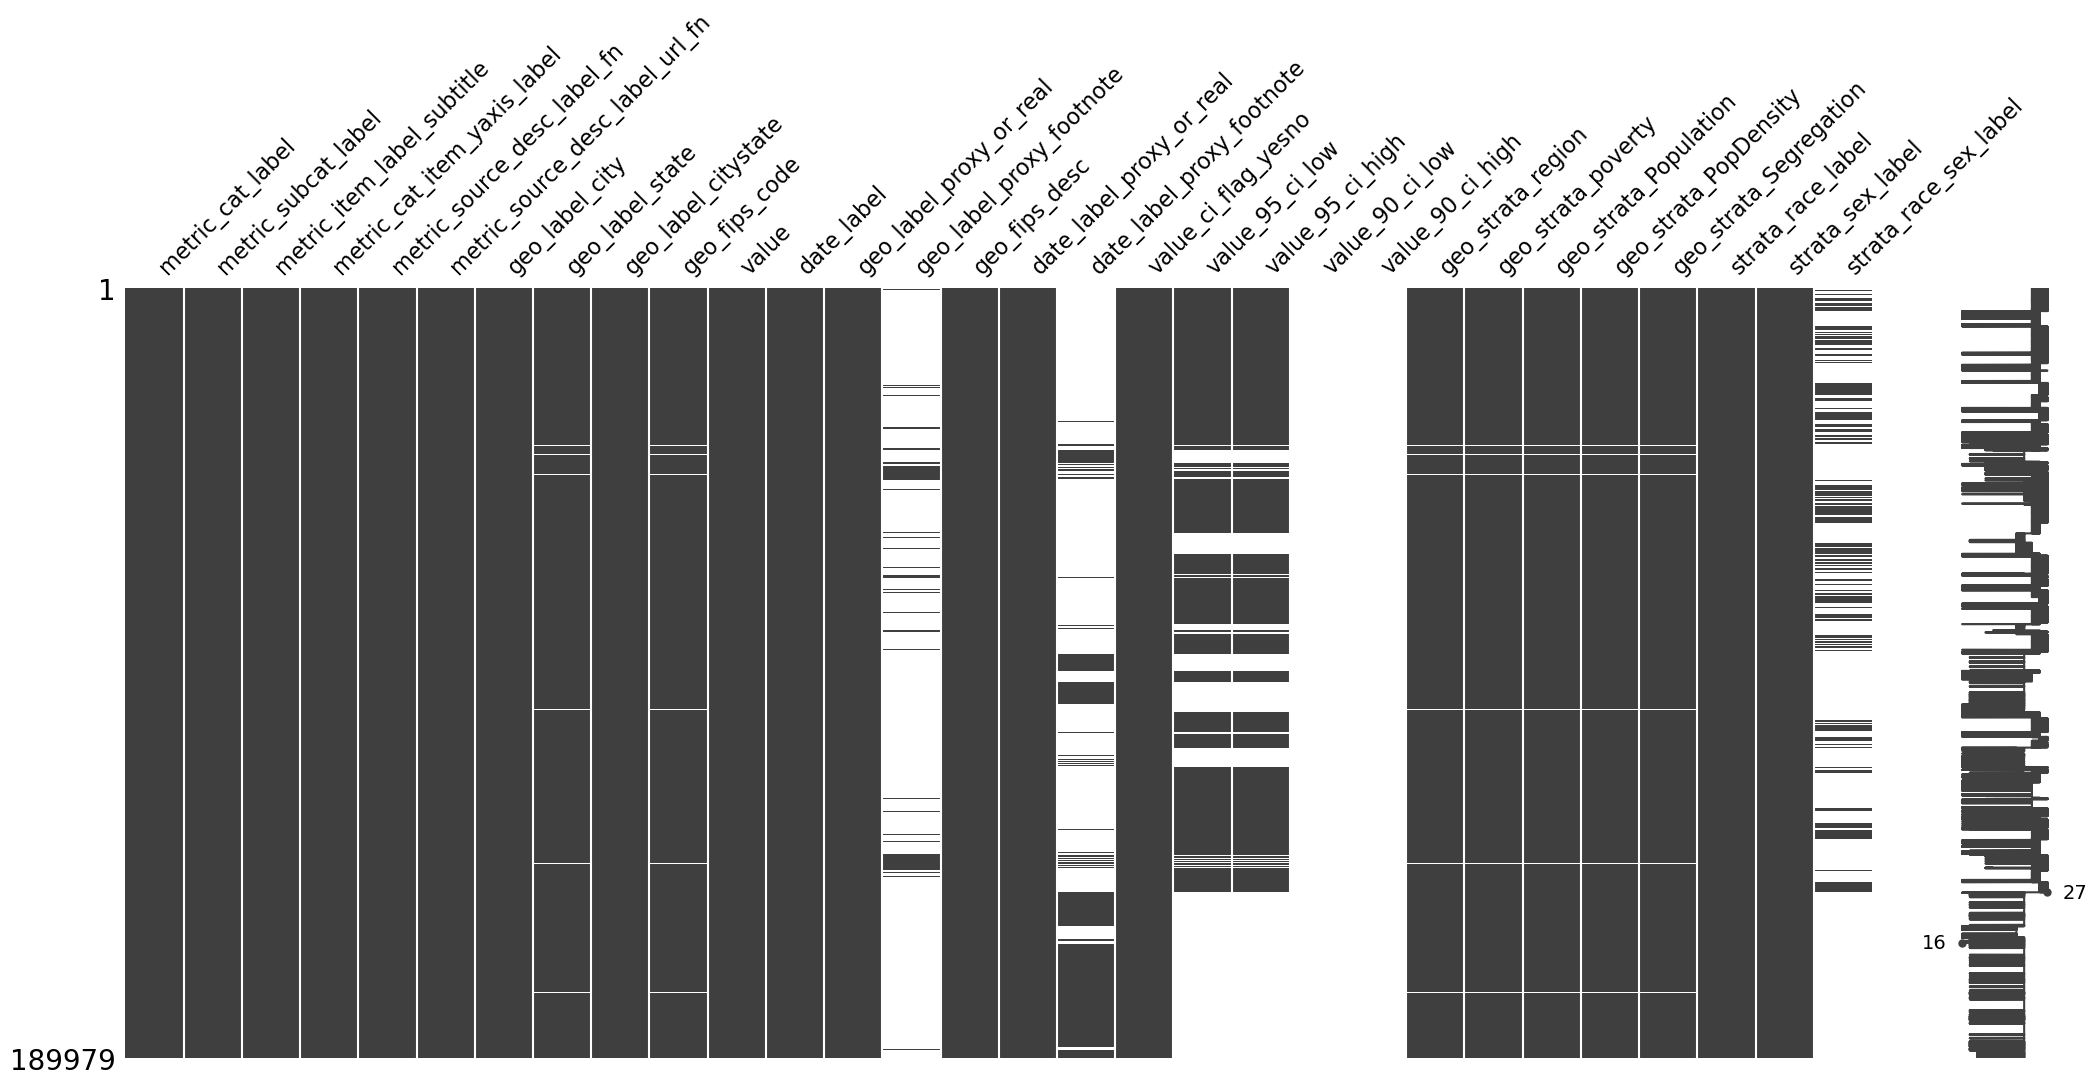

In [180]:
msno.matrix(df);

In [181]:
# 95% 신뢰 구간이 계산되지 않았거나 데이터가 적어서 계산되지 않은 값 제거 
df = df.dropna(subset=['value_95_ci_low', 'value_95_ci_high'])

In [182]:
df.isnull().sum()

metric_cat_label                        0
metric_subcat_label                     0
metric_item_label_subtitle              0
metric_cat_item_yaxis_label             0
metric_source_desc_label_fn             0
metric_source_desc_label_url_fn         0
geo_label_city                          0
geo_label_state                       198
geo_label_citystate                     0
geo_fips_code                         198
value                                   0
date_label                              0
geo_label_proxy_or_real                 0
geo_label_proxy_footnote           105501
geo_fips_desc                           0
date_label_proxy_or_real                0
date_label_proxy_footnote          116947
value_ci_flag_yesno                     0
value_95_ci_low                         0
value_95_ci_high                        0
value_90_ci_low                    118670
value_90_ci_high                   118670
geo_strata_region                     198
geo_strata_poverty                

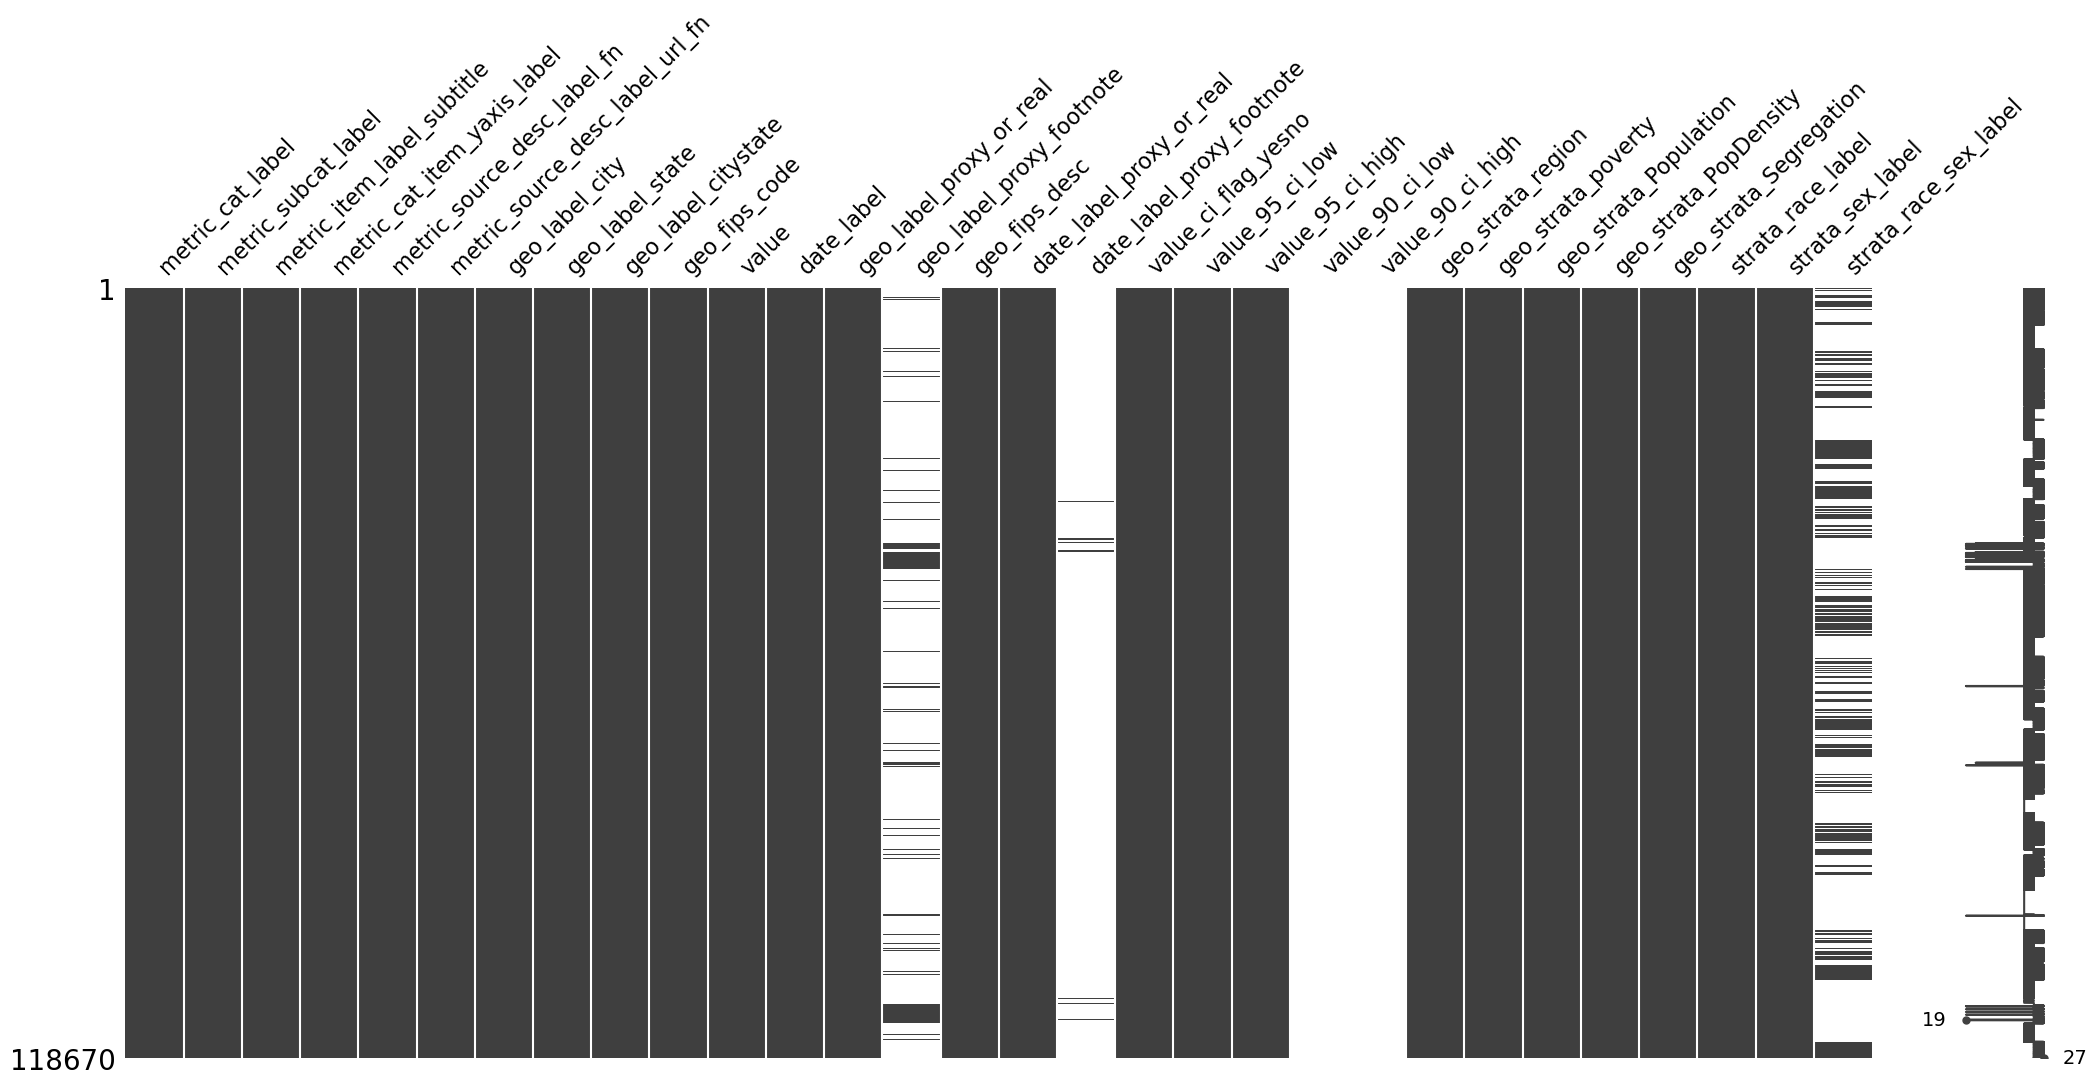

In [183]:
msno.matrix(df);

In [184]:
# 90% 신뢰 구간이 계산되지 않았거나 데이터가 적어서 계산되지 않은 값 제거 
df = df.drop(['value_90_ci_low', 'value_90_ci_high'], axis=1, inplace=True)

In [185]:
msno.matrix(df);

AttributeError: 'NoneType' object has no attribute 'shape'

In [186]:
# 'date_label_proxy_footnote' 제거 
df = df.drop(['date_label_proxy_footnote'], axis=1, inplace=True)

AttributeError: 'NoneType' object has no attribute 'drop'

In [187]:
df.isnull().sum()

AttributeError: 'NoneType' object has no attribute 'isnull'

In [ ]:
# strata_race_sex_label 제거  

In [ ]:
# 질병군으로 cluster? 